In [721]:
import pandas as pd
import numpy as np


In [722]:
sms_df = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\Code practice\\Machine_Learning_Projects\\Email Spam Classifier\\Dataset\\sms_spam.csv')

sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [723]:
email_df= pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\Code practice\\Machine_Learning_Projects\\Email Spam Classifier\\Dataset\\email_spam.csv',encoding='latin-1')

email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [724]:
df= pd.concat([sms_df,email_df], ignore_index=True)

In [725]:
df.shape

(11144, 5)

In [726]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Steps that were taken in the code:

## 1. Data cleaning
## 2. Exploratory Data Analysis (EDA)
## 3. Text Preprocessing
## 4. Model Building
## 5. Model Evaluation
## 6. Improving the Model
<!-- ## 7. Website Deployment
## 8. Deployment -->

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11144 non-null  object
 1   v2          11144 non-null  object
 2   Unnamed: 2  100 non-null    object
 3   Unnamed: 3  24 non-null     object
 4   Unnamed: 4  12 non-null     object
dtypes: object(5)
memory usage: 435.4+ KB


## 1. Data cleaning

In [728]:
# drop unnecessary last 3 columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [729]:
#renameing the columns
df = df.rename(columns={'v1': 'target', 'v2': 'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [730]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])   
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [731]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [732]:
df.duplicated().sum()

np.int64(5533)

In [733]:
# REMOVE DUPLICATE VALUES
df = df.drop_duplicates(keep='first')

In [734]:
df.shape

(5611, 2)

## 2. Exploratory Data Analysis (EDA)

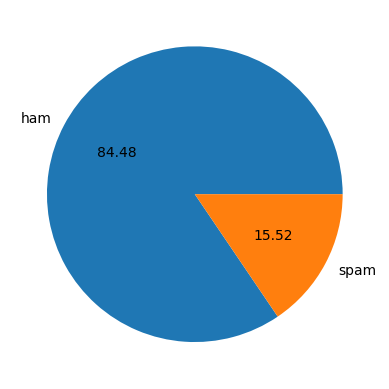

In [735]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [736]:
# data is imbalanced

In [737]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [738]:
df["num_characters"] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [739]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [740]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5611.000000,5611.000000,5611.000000
mean,81.382998,18.862948,2.005168
std,58.114875,13.142735,1.464545
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,64.000000,15.000000,2.000000
75%,124.500000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [741]:
#ham messages
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4740.000000,4740.000000,4740.000000
mean,70.655063,17.175316,1.814979
std,55.768405,13.344505,1.369700
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.250000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [742]:
#spam messages
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,871.000000,871.000000,871.000000
mean,139.764638,28.047072,3.040184
std,28.239223,6.622417,1.530380
min,13.000000,2.000000,1.000000
25%,133.000000,26.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


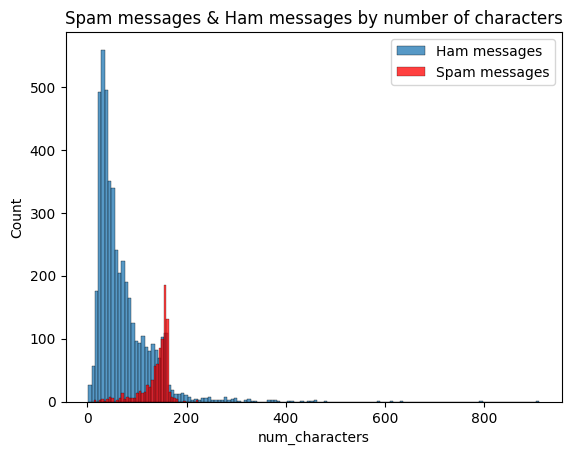

In [743]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red') #spam messages
plt.title('Spam messages & Ham messages by number of characters')
plt.legend(['Ham messages', 'Spam messages'])
plt.show()

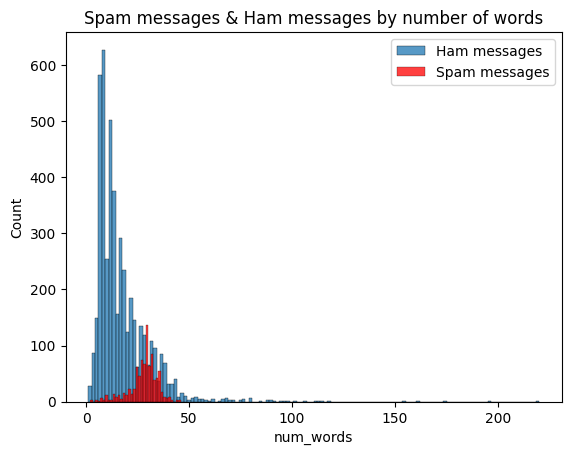

In [744]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red') #spam messages
plt.title('Spam messages & Ham messages by number of words')
plt.legend(['Ham messages', 'Spam messages'])
plt.show()

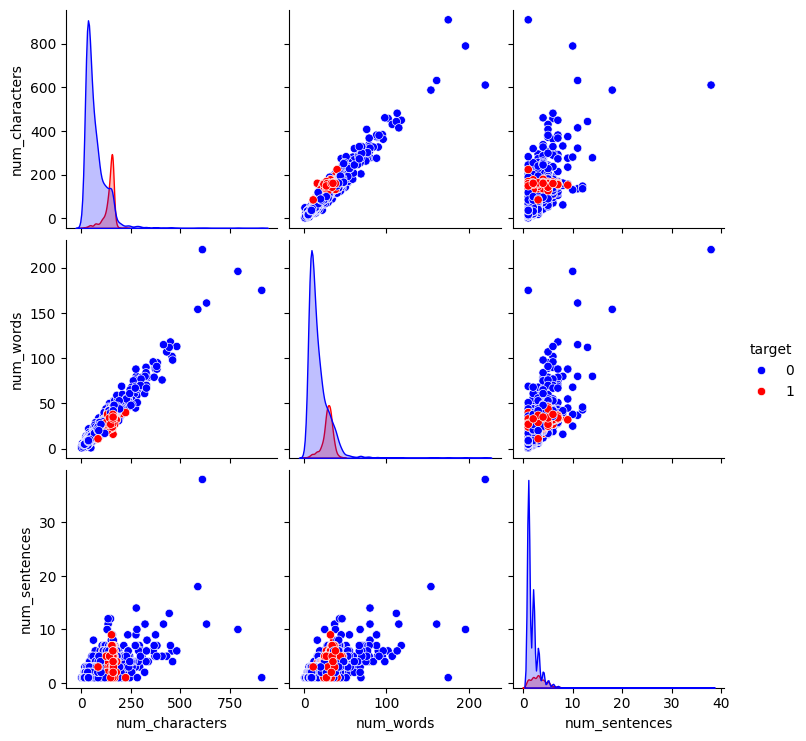

In [745]:
sns.pairplot(df, hue='target', hue_order=[0, 1], palette=['blue', 'red'])

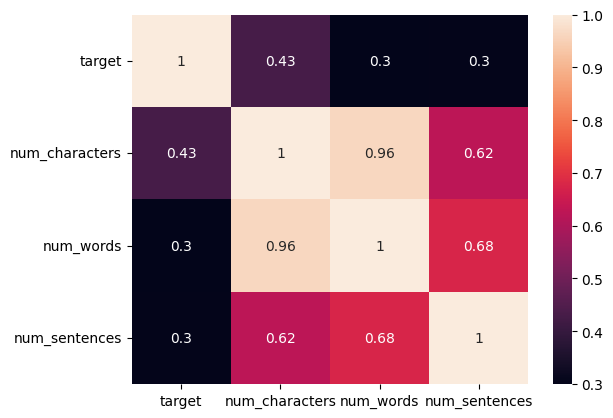

In [746]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')  # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()
# sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special words
- Removing stop words and punctuation
- Stemming
  

In [747]:
def transform_text(text):
    # lower case
    text = text.lower()
    # tokenization
    from nltk.tokenize import word_tokenize
    text = word_tokenize(text)
    # removing special words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    # removing stop words and punctuation
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    y2 = []
    for i in y:
        if i not in stopwords.words('english') and i.isalnum():
            y2.append(i)
    # stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    y3 = []
    for i in y2:
        y3.append(ps.stem(i))
    return " ".join(y3)

In [748]:
df["transformed_text"] = df['text'].apply(transform_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [749]:
! pip install wordcloud -q

In [750]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

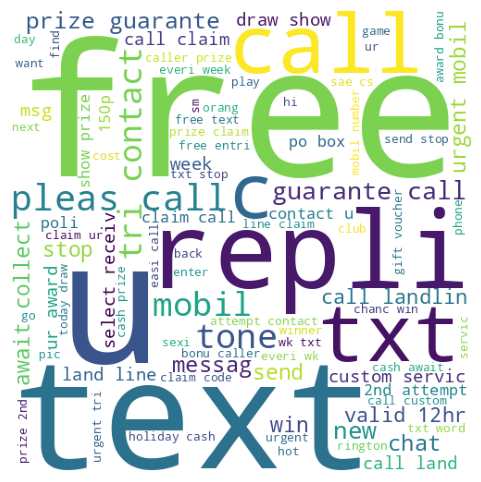

In [751]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off')

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

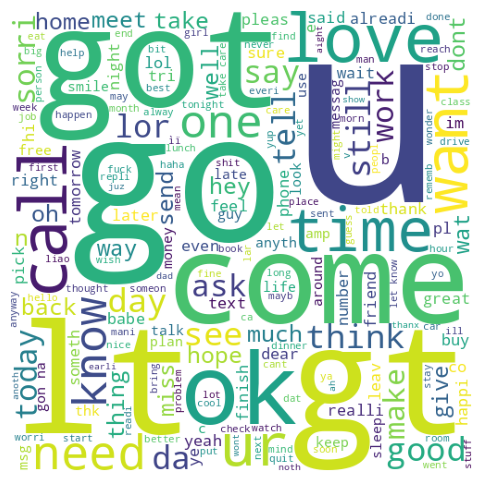

In [752]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.axis('off')

In [753]:
# words in Spam messages
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [754]:
# spam_corpus

In [755]:
len(spam_corpus)

13334

In [756]:
from collections import Counter 
Counter(spam_corpus).most_common(30)

[('call', 430),
 ('free', 225),
 ('2', 214),
 ('txt', 193),
 ('u', 173),
 ('claim', 167),
 ('ur', 164),
 ('mobil', 162),
 ('prize', 155),
 ('text', 148),
 ('4', 133),
 ('stop', 121),
 ('repli', 118),
 ('urgent', 101),
 ('award', 98),
 ('get', 90),
 ('cash', 89),
 ('contact', 83),
 ('guarante', 81),
 ('win', 80),
 ('send', 78),
 ('new', 77),
 ('servic', 76),
 ('tone', 75),
 ('collect', 74),
 ('pleas', 71),
 ('week', 66),
 ('nokia', 66),
 ('draw', 66),
 ('c', 63)]

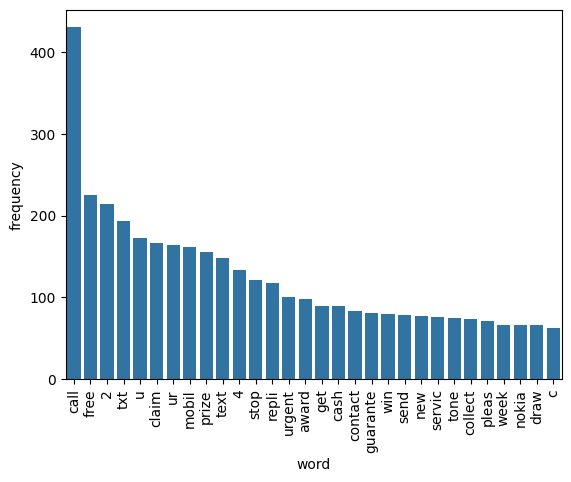

In [757]:
import pandas as pd
import seaborn as sns
from collections import Counter

spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'frequency']
)

sns.barplot(x='word', y='frequency', data=spam_df)
plt.fig_size=(12, 6)
plt.xticks(rotation='vertical')
plt.show()



In [758]:
# words in Ham messages
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [759]:
# ham_corpus

In [760]:
len(ham_corpus)

37371

In [761]:
from collections import Counter 
Counter(ham_corpus).most_common(30)

[('u', 927),
 ('go', 443),
 ('get', 364),
 ('2', 309),
 ('come', 295),
 ('lt', 288),
 ('gt', 288),
 ('got', 258),
 ('like', 252),
 ('know', 240),
 ('call', 240),
 ('ok', 239),
 ('time', 238),
 ('good', 225),
 ('love', 221),
 ('want', 213),
 ('ur', 213),
 ('day', 195),
 ('need', 179),
 ('4', 179),
 ('lor', 175),
 ('one', 174),
 ('home', 171),
 ('da', 160),
 ('think', 157),
 ('still', 154),
 ('see', 153),
 ('take', 150),
 ('tell', 138),
 ('say', 136)]

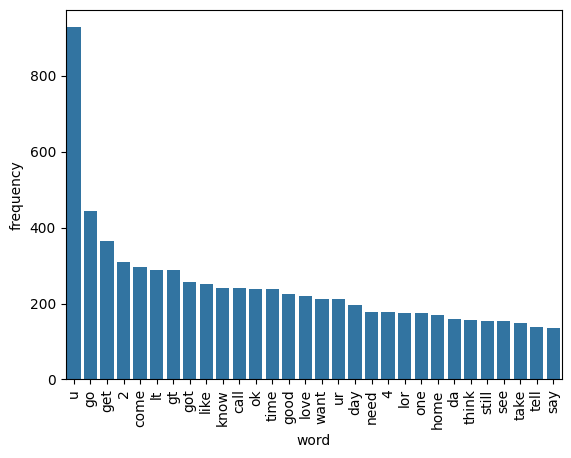

In [762]:
import pandas as pd
import seaborn as sns
from collections import Counter

ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=['word', 'frequency']
)

sns.barplot(x='word', y='frequency', data=ham_df)
plt.fig_size=(12, 6)
plt.xticks(rotation='vertical')
plt.show()



## 4. Model Building

In [763]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()
# x = cv.fit_transform(df['transformed_text']).toarray()


In [764]:
x.shape

(5611, 3000)

In [765]:
y=df['target'].values
y

array([0, 0, 1, ..., 1, 1, 0], shape=(5611,))

In [766]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)    


In [767]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [768]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [769]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

In [770]:

print("Gaussian Naive Bayes:", accuracy_score(y_test, y_pred1)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

Gaussian Naive Bayes: 0.8691006233303651
Confusion Matrix:
 [[830 123]
 [ 24 146]]
Precision: 0.5427509293680297


In [771]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

In [772]:
print("Multinomial Naive Bayes:", accuracy_score(y_test, y_pred2)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

Multinomial Naive Bayes: 0.97506678539626
Confusion Matrix:
 [[951   2]
 [ 26 144]]
Precision: 0.9863013698630136


In [773]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

In [774]:
print("Bernoulli Naive Bayes:", accuracy_score(y_test, y_pred3)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

Bernoulli Naive Bayes: 0.9857524487978628
Confusion Matrix:
 [[951   2]
 [ 14 156]]
Precision: 0.9873417721518988


In [775]:
# we selected TfidfVectorizer and Multinomial Naive Bayes as our final model and

In [776]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier , BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [777]:
svc=SVC(kernel="sigmoid",gamma=1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [778]:
clfs={
    "SVC":svc,
    "KNC":knc,
    "MNB":mnb,
    "DTC":dtc,
    "LRC":lrc,
    "RFC":rfc,
    "ABC":abc,
    "BC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "XGB":xgb
}

In [779]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [780]:
# def train_classifier(clf, x_train, y_train, x_test, y_test):
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
    
#     return accuracy, precision


In [781]:
%%time
train_classifier(svc, x_train, y_train, x_test, y_test)

CPU times: total: 3.81 s
Wall time: 3.85 s


(0.9777382012466608, 0.9738562091503268)

In [782]:
%%time

accuracy_list = []
precision_list = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, x_train, y_train, x_test, y_test
    )
    
    # print("For", name)
    # print("Accuracy - ", current_accuracy)
    # print("Precision - ", current_precision)
    # print()
    
    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)


CPU times: total: 1min 15s
Wall time: 1min 10s


In [783]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list
}).sort_values(by='Precision', ascending=False)

# performance_df


In [784]:
performance_df1=pd.melt(performance_df, id_vars = 'Algorithm')

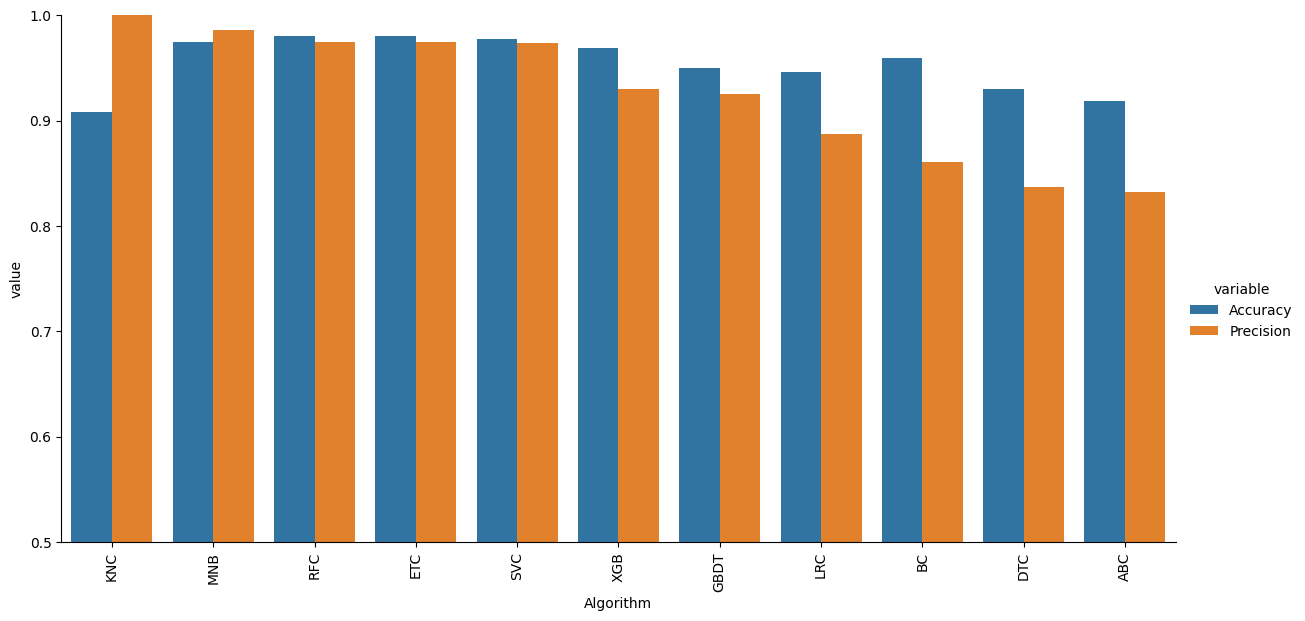

In [785]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=6,
    aspect=2
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()


## Model Improvement
### 1. Change the max_features parameter of TfIdf

In [786]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_list,'Precision_max_ft_3000':precision_list}).sort_values('Precision_max_ft_3000',ascending=False)

In [787]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_list,'Precision_scaling':precision_list}).sort_values('Precision_scaling',ascending=False)

In [788]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [789]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [790]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_list,'Precision_num_chars':precision_list}).sort_values('Precision_num_chars',ascending=False)

In [791]:
new_df_scaled.merge(temp_df,on='Algorithm') 

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNC,0.908281,1.000000,0.908281,1.000000,0.908281,1.000000,0.908281,1.000000
1,MNB,0.975067,0.986301,0.975067,0.986301,0.975067,0.986301,0.975067,0.986301
2,RFC,0.980410,0.974359,0.980410,0.974359,0.980410,0.974359,0.980410,0.974359
3,ETC,0.980410,0.974359,0.980410,0.974359,0.980410,0.974359,0.980410,0.974359
4,SVC,0.977738,0.973856,0.977738,0.973856,0.977738,0.973856,0.977738,0.973856
5,XGB,0.968833,0.929936,0.968833,0.929936,0.968833,0.929936,0.968833,0.929936
6,GBDT,0.950134,0.925373,0.950134,0.925373,0.950134,0.925373,0.950134,0.925373
7,LRC,0.946572,0.887324,0.946572,0.887324,0.946572,0.887324,0.946572,0.887324
8,BC,0.959929,0.861272,0.959929,0.861272,0.959929,0.861272,0.959929,0.861272
9,DTC,0.929653,0.837037,0.929653,0.837037,0.929653,0.837037,0.929653,0.837037


In [792]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
# voting.fit(x_train,y_train)

In [793]:
# y_pred = voting.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [794]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

In [795]:
# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [796]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# import pickle

# # raw text & label
# X = df['text']          # must be text
# y = df['label']

# # split
# x_train, x_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # vectorizer
# tfidf = TfidfVectorizer()
# x_train_tfidf = tfidf.fit_transform(x_train)

# # model
# model = MultinomialNB()
# model.fit(x_train_tfidf, y_train)

# # save
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(model, open('model.pkl', 'wb'))


In [797]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))